[**The link for the tutorial**](https://www.youtube.com/watch?v=2JiXktBn_2M)

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, KFold

np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
def get_accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

**Example Program**

In [0]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [0]:
# graph = tf.Graph()
# with graph.as_default():

#   batch_size = 128
#   beta = .001
#   image_size = 28
#   num_labels = 10

#   tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size * image_size))
#   tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
#   tf_valid_dataset = tf.constant(mnist.validation.images)
#   tf_test_dataset = tf.constant(mnist.test.images)

#   w_logit = tf.Variable(tf.truncated_normal([image_size * image_size, num_labels]))
#   b_logit = tf.Variable(tf.zeros([num_labels]))

#   def model(data):
#     return tf.matmul(data, w_logit) + b_logit

#   logits = model(tf_train_dataset)
#   loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf_train_labels))
#   regularized_loss = tf.nn.l2_loss(w_logit) 
#   total_loss = loss + beta + regularized_loss

#   optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(total_loss)

#   train_prediction = tf.nn.softmax(logits)
#   valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
#   test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [0]:
# num_step = 1001

# with tf.Session(graph=graph) as session:
#   tf.global_variables_initializer().run()
#   print("initialized")

#   for step in range(num_step):
#     batch_data, batch_labels = mnist.train.next_batch(batch_size=batch_size)
#     feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}

#     _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

#     if (step % 500 == 0):
#       print("minibatch loss at step %d: %f" % (step, l))
#       print("minibatch accuracy: %.1f%%" % get_accuracy(predictions, batch_labels))
#       print("validation accuracy: %.1f%%" % get_accuracy(valid_prediction.eval(), mnist.validation.labels))
#       print("\n")
  
#   print("test accuracy: %.1f%%" % get_accuracy(test_prediction.eval(), mnist.test.labels))

**Data Preprocessing**

In [0]:
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Content-Based Recommender System Data/Hypothesis Data/data-17-fv-tf-idf-scores-200.csv', header=None, sep=',')
data_frame.shape

(7556, 1562)

In [0]:
header = []

for i in range(len(data_frame.columns)-1):
  header.append(str(i))

header.append('target')

data_frame.columns = header
data_frame.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '1552', '1553', '1554', '1555', '1556', '1557', '1558', '1559', '1560',
       'target'],
      dtype='object', length=1562)

,counts
journal_id,
8,2645
0,763
1,754
4,639
2,599
5,595
3,536
6,525
7,500


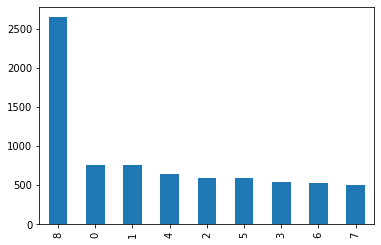

In [0]:
value_counts = data_frame['target'].value_counts()
value_counts.plot(kind='bar')
value_counts.rename_axis('journal_id').to_frame('counts')

In [0]:
data_labels = data_frame['target']
data_features = data_frame.drop('target',axis=1)

near_miss = SMOTE()
x_undersampled, y_undersampled = near_miss.fit_sample(data_features, data_labels)

print(x_undersampled.shape)
print(y_undersampled.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(23805, 1561)
(23805,)


In [0]:
data_labels = data_frame['target']
data_features = data_frame.drop('target',axis=1)

near_miss = NearMiss(random_state=42)
x_undersampled, y_undersampled = near_miss.fit_sample(data_features, data_labels)

print(x_undersampled.shape)
print(y_undersampled.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(4500, 1561)
(4500,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# data_labels = data_frame['target']
# data_features = data_frame.drop('target',axis=1)

# smk = SMOTETomek(random_state=42)
# x_undersampled, y_undersampled = smk.fit_sample(data_features, data_labels)

# print(x_undersampled.shape)
# print(y_undersampled.shape)

In [0]:
data_features_df = pd.DataFrame(data = x_undersampled[0:,0:], 
                                index = [i for i in range(x_undersampled.shape[0])],
                                columns = [str(i) for i in range(x_undersampled.shape[1])])

data_labels_df = pd.DataFrame(data = y_undersampled[0:], 
                                index = [i for i in range(y_undersampled.shape[0])],
                                columns = ['target'])

data_frame_undersampled = data_features_df.join(data_labels_df)

print(data_features_df.head())
print(data_labels_df.head())
print(data_frame_undersampled.head())

          0         1         2         3  ...  1557  1558  1559  1560
0  4.602792  0.000000  0.306853  0.306853  ...   0.0   0.0   0.0   0.0
1  0.000000  0.000000  0.306853  0.306853  ...   0.0   0.0   0.0   0.0
2  1.227411  0.000000  0.306853  0.000000  ...   0.0   0.0   0.0   0.0
3  0.920558  0.306853  0.000000  0.000000  ...   0.0   0.0   0.0   0.0
4  1.841117  0.000000  0.306853  0.000000  ...   0.0   0.0   0.0   0.0

[5 rows x 1561 columns]
   target
0       0
1       0
2       0
3       0
4       0
          0         1         2         3  ...  1558  1559  1560  target
0  4.602792  0.000000  0.306853  0.306853  ...   0.0   0.0   0.0       0
1  0.000000  0.000000  0.306853  0.306853  ...   0.0   0.0   0.0       0
2  1.227411  0.000000  0.306853  0.000000  ...   0.0   0.0   0.0       0
3  0.920558  0.306853  0.000000  0.000000  ...   0.0   0.0   0.0       0
4  1.841117  0.000000  0.306853  0.000000  ...   0.0   0.0   0.0       0

[5 rows x 1562 columns]


,counts
journal_id,
8,2645
7,2645
6,2645
5,2645
4,2645
3,2645
2,2645
1,2645
0,2645


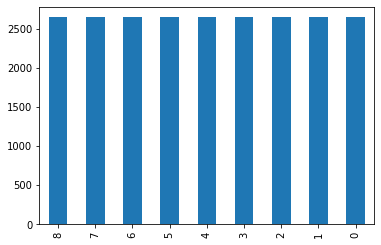

In [0]:
value_counts_undersampled = data_labels_df['target'].value_counts()
value_counts_undersampled.plot(kind='bar')
value_counts_undersampled.rename_axis('journal_id').to_frame('counts')

In [0]:
data_frame_shuffled_once = data_frame_undersampled.sample(frac=1)
data_frame_shuffled_twice = data_frame_shuffled_once.sample(frac=1)
data_frame_shuffled_twice.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,target
19783,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.220058,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.306853,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
15354,3.146476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.145632,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.452484,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.145632,0.0,0.0,0.0,0.0,0.0,0.161221,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1137,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.306853,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.306853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.613706,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17729,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157149,0.000000,0.0,0.0,0.299407,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.149703,0.0,0.0,0.0,0.000000,0.0,0.0,0.157149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
6839,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.454823,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.920558,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


**Program Train Test Split Data**

In [0]:
data_train, data_test = train_test_split(data_frame_shuffled_twice, test_size = 0.2)

data_train_features = data_train.drop('target',axis=1)
data_train_labels = data_train['target']

data_test_features = data_test.drop('target',axis=1)
data_test_labels = data_test['target']

In [0]:
batch_size = 32
beta = .001
learning_rate = 0.001
num_epoch = 101
num_features = 1561
num_labels = 9

In [0]:
def to_onehot(y):
  data = np.zeros((num_labels))
  data[y] = 1
  return data

data_train_labels_one_hot_encoded = np.array([to_onehot(label) for label in data_train_labels])
data_test_labels_one_hot_encoded = np.array([to_onehot(label) for label in data_test_labels])

print(data_train_labels_one_hot_encoded.shape)
print(data_test_labels_one_hot_encoded.shape)

(19044, 9)
(4761, 9)


In [0]:
graph = tf.Graph()

with graph.as_default():

  tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_test_dataset = tf.constant(data_test_features, dtype=tf.float32)

  w_logit = tf.Variable(tf.truncated_normal([num_features, num_labels]))
  b_logit = tf.Variable(tf.zeros([num_labels]))

  def model(data):
    return tf.matmul(data, w_logit) + b_logit

  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf_train_labels))
  regularized_loss = tf.nn.l2_loss(w_logit) 
  total_loss = loss + beta + regularized_loss

  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

  train_prediction = tf.nn.softmax(logits)
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

initialized
length of data train: 19044
total batch: 595
epoch: 0
minibatch loss: 4.655482
minibatch accuracy: 6.2%


epoch: 1
minibatch loss: 3.126366
minibatch accuracy: 9.4%


epoch: 2
minibatch loss: 2.472378
minibatch accuracy: 9.4%


epoch: 3
minibatch loss: 2.220194
minibatch accuracy: 15.6%


epoch: 4
minibatch loss: 2.125378
minibatch accuracy: 21.9%


epoch: 5
minibatch loss: 2.088016
minibatch accuracy: 50.0%


epoch: 6
minibatch loss: 2.072122
minibatch accuracy: 59.4%


epoch: 7
minibatch loss: 2.064824
minibatch accuracy: 62.5%


epoch: 8
minibatch loss: 2.061251
minibatch accuracy: 65.6%


epoch: 9
minibatch loss: 2.059409
minibatch accuracy: 68.8%


epoch: 10
minibatch loss: 2.058416
minibatch accuracy: 71.9%


epoch: 11
minibatch loss: 2.057855
minibatch accuracy: 75.0%


epoch: 12
minibatch loss: 2.057520
minibatch accuracy: 75.0%


epoch: 13
minibatch loss: 2.057308
minibatch accuracy: 75.0%


epoch: 14
minibatch loss: 2.057162
minibatch accuracy: 75.0%


epoch: 15
m

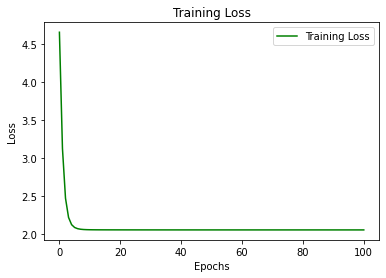

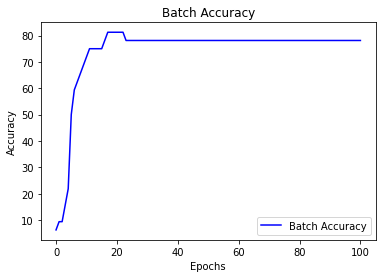

test accuracy: 80.9%


In [0]:
with tf.Session(graph=graph) as session:
  tf.global_variables_initializer().run()
  print("initialized")

  avg_batch_loss_list = []
  batch_accuracy_list = []
  total_batch = len(data_train_features)//batch_size
  print("length of data train: %d" % len(data_train_features))
  print("total batch: %d" % total_batch)

  for epoch in range(num_epoch):
    
    total_loss = 0

    for i in range(0, (total_batch * batch_size), batch_size):
      batch_index = range(i, i+1*batch_size)
      batch_data = data_train_features[i:i+1*batch_size]
      batch_labels = data_train_labels_one_hot_encoded[i:i+1*batch_size]

      feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
      _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

      total_loss += l

      if (i == (total_batch * batch_size) - batch_size):
        batch_accuracy = get_accuracy(predictions, batch_labels)
        batch_accuracy_list.append(batch_accuracy)

        avg_batch_loss = total_loss / total_batch
        avg_batch_loss_list.append(avg_batch_loss)
        
        print("epoch: %d" % epoch)
        print("minibatch loss: %f" % avg_batch_loss)
        print("minibatch accuracy: %.1f%%" % batch_accuracy)
        print("\n")

  epochs_range = range(0, num_epoch)

  plt.plot(epochs_range, avg_batch_loss_list, 'g', label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs_range, batch_accuracy_list, 'b', label='Batch Accuracy')
  plt.title('Batch Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  print("test accuracy: %.1f%%" % get_accuracy(test_prediction.eval(), data_test_labels_one_hot_encoded))



---



---



---



---



**FAILED Program KFOLD**

In [0]:
batch_size = 32
beta = .001
learning_rate = 0.001
num_epoch = 101
num_features = 1561
num_labels = 9
num_k_splits = 10

In [0]:
def to_onehot(y):
  data = np.zeros((num_labels))
  data[y] = 1
  return data

In [0]:
history = {}
fold_counter = 1
kfold = KFold(n_splits= num_k_splits, random_state=None, shuffle=True)

for train_index, test_index in kfold.split(data_frame_shuffled_twice):

  print("\n==================================")
  print("Fold: %d" % fold_counter)

  k_fold_train_data = data_frame_shuffled_twice.loc[train_index, : ]
  k_fold_train_features = k_fold_train_data.drop('target',axis=1).to_numpy()
  k_fold_train_labels = k_fold_train_data['target']
  k_fold_train_labels_one_hot_encoded = np.array([to_onehot(label) for label in k_fold_train_labels])

  k_fold_test_data = data_frame_shuffled_twice.loc[test_index, : ]
  k_fold_test_features = k_fold_test_data.drop('target',axis=1).to_numpy()
  k_fold_test_labels = k_fold_test_data['target']
  k_fold_test_labels_one_hot_encoded = np.array([to_onehot(label) for label in k_fold_test_labels])

  reindexed_train_index = np.arange(len(train_index)) 

  graph = tf.Graph()

  with graph.as_default():

    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_test_dataset = tf.constant(k_fold_test_features, dtype=tf.float32)

    w_logit = tf.Variable(tf.truncated_normal([num_features, num_labels]))
    b_logit = tf.Variable(tf.zeros([num_labels]))

    def model(data):
      return tf.matmul(data, w_logit) + b_logit

    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=tf_train_labels))
    regularized_loss = tf.nn.l2_loss(w_logit) 
    total_loss = loss + beta + regularized_loss

    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

    train_prediction = tf.nn.softmax(logits)
    test_prediction = tf.nn.softmax(model(tf_test_dataset))

  with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()

    avg_batch_loss_list = []
    batch_accuracy_list = []
    total_batch = len(train_index)//batch_size
    
    for epoch in range(num_epoch):

      total_loss = 0

      for i in range(0, (total_batch * batch_size), batch_size):

        batch_index = reindexed_train_index[i : i+1*batch_size]
        batch_features = k_fold_train_features[batch_index, : ]
        batch_labels = k_fold_train_labels_one_hot_encoded[batch_index, : ]

        feed_dict = {tf_train_dataset : batch_features, tf_train_labels : batch_labels}
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

        total_loss += l

      batch_accuracy = get_accuracy(predictions, batch_labels)
      batch_accuracy_list.append(batch_accuracy)

      avg_batch_loss = total_loss / total_batch
      avg_batch_loss_list.append(avg_batch_loss)
      
      print("epoch: %d" % epoch)
      print("minibatch loss: %f" % avg_batch_loss)
      print("minibatch accuracy: %.1f%%" % batch_accuracy)
      print("\n")

    test_accuracy = get_accuracy(test_prediction.eval(), k_fold_test_labels_one_hot_encoded)
    
    print("test accuracy: %.1f%%" % test_accuracy)
    print("\n")

  tf.reset_default_graph()

  history_dict = {
      "batch_loss": avg_batch_loss_list,
      "batch_accuracy": batch_accuracy_list,
      "test_accuracy": test_accuracy 
  }

  history[str(fold_counter)] = history_dict
  history_dict = {}
  fold_counter += 1

Streaming output truncated to the last 5000 lines.


epoch: 22
minibatch loss: 2.053018
minibatch accuracy: 68.8%


epoch: 23
minibatch loss: 2.052969
minibatch accuracy: 68.8%


epoch: 24
minibatch loss: 2.052925
minibatch accuracy: 71.9%


epoch: 25
minibatch loss: 2.052884
minibatch accuracy: 71.9%


epoch: 26
minibatch loss: 2.052846
minibatch accuracy: 71.9%


epoch: 27
minibatch loss: 2.052812
minibatch accuracy: 71.9%


epoch: 28
minibatch loss: 2.052780
minibatch accuracy: 75.0%


epoch: 29
minibatch loss: 2.052751
minibatch accuracy: 81.2%


epoch: 30
minibatch loss: 2.052724
minibatch accuracy: 81.2%


epoch: 31
minibatch loss: 2.052700
minibatch accuracy: 84.4%


epoch: 32
minibatch loss: 2.052677
minibatch accuracy: 87.5%


epoch: 33
minibatch loss: 2.052656
minibatch accuracy: 87.5%


epoch: 34
minibatch loss: 2.052637
minibatch accuracy: 87.5%


epoch: 35
minibatch loss: 2.052619
minibatch accuracy: 87.5%


epoch: 36
minibatch loss: 2.052603
minibatch accuracy: 87.5%


ep

In [0]:
for epoch in history:
  print("\n==================================")
  print("Epoch: %s" % epoch)

  history_batch_loss = history[epoch]['batch_loss']
  history_batch_accuracy = history[epoch]['batch_accuracy']
  history_test_accuracy = history[epoch]['test_accuracy']

  epochs_range = range(0, num_epoch)

  plt.plot(epochs_range, history_batch_loss, 'g', label='Training Loss')
  plt.title('Training Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs_range, history_batch_accuracy, 'b', label='Batch Accuracy')
  plt.title('Batch Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  print("Test Accuracy: %.1f%%" % history_test_accuracy)
  print("\n")